<a href="https://colab.research.google.com/github/CristhiamGonzalez/IA/blob/main/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ORO!!! Forecasting

In [24]:
## Importando las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#@title Texto de título predeterminado
dataframeGold = pd.read_excel('gold_price_data.xlsx')


In [9]:
print(dataframeGold.dtypes)
dataframeGold.head(10)

Date     datetime64[ns]
Value           float64
dtype: object


,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4
5,1971-04-01,38.9
6,1971-07-01,40.1
7,1971-10-01,42.0
8,1972-01-03,43.5
9,1972-04-03,48.3


In [11]:
etiqueta = np.array(dataframeGold['Value'])[2:]
car_m1 = np.array(dataframeGold['Value'])[1:-1]
car_m2 = np.array(dataframeGold['Value'])[:-2]
print("%d datos cargados " % len(etiqueta))
print("%d datos cargados " % len(car_m1))
print("%d datos cargados " % len(car_m2))

10785 datos cargados 
10785 datos cargados 
10785 datos cargados 


In [12]:
## Agrupando los datos en un único Dataframe y exportándolo a un archivo CSV
dataset = pd.DataFrame({'Carac menos 2':car_m2, 'Carac menos 1':car_m1, 'Etiqueta':etiqueta})
dataset.to_csv('goldPriceArranged.csv')

In [13]:
## Pasando los datos a una matriz de tipo numpy
matrizDatos = dataset.to_numpy()
print(matrizDatos.shape)

(10785, 3)


In [14]:
def funcCosto(arr_1, arr_2):
  J = np.power(arr_1-arr_2,2)
  return np.sum(J)/(2*len(J))

  ## Prueba de la función de costo
print(funcCosto(etiqueta,etiqueta))
print(funcCosto(np.array([0, 0, 0, 0, 0,1]),np.array([1, 0, 1, 1, 1,1])))


0.0
0.3333333333333333


In [27]:
## Pasos GridSearch
#  h(x) = T0 + T1*x

# 1. Valores a T0 a T1
dict_resultados = dict()
for T0 in np.arange(-15,5,2/100):
  for T1 in np.arange(-15,5,2/100):

#   2. Encuentras h(x)
    h_x = T0 + T1*car_m1

#   3. Evalúar la función de costo
    dict_resultados[(T0,T1)]=funcCosto(h_x,etiqueta)
    
# 4. Encontrar el menor
parameters = list(dict_resultados.keys())

#print(parameters)
costValues = np.array(list(dict_resultados.values()))

#print(costValues)
indexMinCost = costValues.argmin()
print(indexMinCost)
bestParameters = parameters[indexMinCost]



757800


Los mejores parámetros son: (0.13999999999967727, 0.9999999999996589)  la función de costo retornó:  40.798951580892876


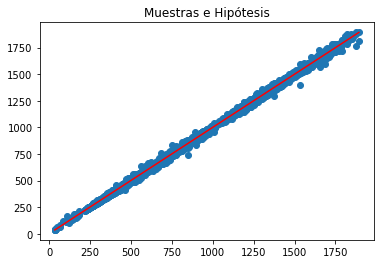

In [28]:
print("Los mejores parámetros son:",bestParameters," la función de costo retornó: ",costValues[indexMinCost])
plt.scatter(car_m1,etiqueta)
x = np.arange(car_m1.min(),car_m1.max(),(car_m2.max()-car_m1.min())/1000)
plt.plot(x,bestParameters[0]+bestParameters[1]*x,'r-')
plt.title("Muestras e Hipótesis")
plt.show()